# **Proyecto de Predicción de Ventas: Rossmann Store Sales**

## **Descripción del Proyecto**
Este proyecto se enfoca en predecir las ventas diarias de las tiendas de la cadena Rossmann, utilizando datos históricos, características específicas de cada tienda y factores externos. La solución está orientada a optimizar la gestión de inventarios, la planificación de recursos y la toma de decisiones estratégicas.

## **Objetivos del Proyecto**
- Construir un modelo de aprendizaje automático que permita predecir las ventas futuras de manera precisa.
- Identificar las variables más influyentes en las ventas diarias.
- Generar un informe visual e interactivo que facilite la interpretación de los resultados y sirva como herramienta para la toma de decisiones.

## **Estructura del Proyecto**
1. **Carga y Exploración Inicial de Datos**: Inspección de los datos disponibles y detección de posibles inconsistencias.
2. **Análisis Exploratorio de Datos (EDA)**: Comprensión de patrones y relaciones entre las variables.
3. **Preprocesamiento de los Datos**: Manejo de valores nulos, codificación de variables categóricas y transformación de datos.
4. **Construcción de Modelos Predictivos**: Entrenamiento de modelos de aprendizaje automático.
5. **Evaluación del Modelo**: Medición de la precisión y optimización del modelo.
6. **Visualización de Resultados**: Creación de gráficos y dashboards interactivos.
7. **Conclusiones y Recomendaciones**: Síntesis de los hallazgos y recomendaciones estratégicas.

## **Archivos Utilizados**
- `train.csv`: Datos históricos de ventas utilizados para entrenar el modelo.
- `test.csv`: Datos para evaluar el modelo y realizar predicciones.
- `store.csv`: Información adicional sobre las características de las tiendas.
- `sample_submission.csv`: Plantilla para el formato de las predicciones finales.

## **Herramientas Utilizadas**
- **Lenguaje de Programación**: Python
- **Bibliotecas**: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, XGBoost
- **Entorno de Desarrollo**: Jupyter Notebook
- **Dataset**: Proporcionado por Kaggle

---

# Carga y Exploración Inicial de los Datos

Este paso consiste en cargar y realizar una inspección básica de los datasets que se utilizarán en el proyecto. Los archivos involucrados son:

1. `train.csv`: Contiene los datos históricos de ventas utilizados para entrenar el modelo.
2. `test.csv`: Incluye los datos para realizar predicciones.
3. `store.csv`: Contiene información sobre las características de las tiendas.
4. `sample_submission.csv`: Un archivo de ejemplo con el formato esperado para las predicciones.

---

## 1. Carga de Datos
- Los archivos son cargados en dataframes utilizando **pandas**.
- Esto asegura que los datos estén listos para ser procesados y analizados.

---

## 2. Información General de los Datasets
- Se imprime la estructura y resumen de cada dataset utilizando el método `.info()`.
- Esto permite identificar:
  - Número de filas y columnas.
  - Tipos de datos.
  - Valores nulos presentes en cada columna.

---

## 3. Exploración de las Primeras Filas
- Para entender mejor el contenido, se muestran las primeras filas de cada archivo con el método `.head()`.
- Esto ayuda a verificar la correcta carga de los datos y proporciona un vistazo inicial a su estructura.

---

## Resultados Esperados
Tras este análisis inicial, obtendremos:
- Un resumen claro de la estructura de los datasets.
- Una comprensión básica del contenido y formato de los datos.
- Identificación temprana de posibles problemas, como valores nulos o tipos de datos incorrectos, para abordar en etapas posteriores.

In [19]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np

# Cargar los archivos CSV
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
store_data = pd.read_csv('store.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Mostrar información básica de los datos
print("Información del Dataset de Ventas (train):")
print(train_data.info())

print("\nInformación del Dataset de Prueba (test):")
print(test_data.info())

print("\nInformación del Dataset de Tiendas (store):")
print(store_data.info())

print("\nInformación del Archivo de Submisión (sample_submission):")
print(sample_submission.info())

# Opcional: Ver las primeras filas de cada archivo
print("\nPrimeras filas de train.csv:")
print(train_data.head())

print("\nPrimeras filas de test.csv:")
print(test_data.head())

print("\nPrimeras filas de store.csv:")
print(store_data.head())

print("\nPrimeras filas de sample_submission.csv:")
print(sample_submission.head())

Información del Dataset de Ventas (train):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None

Información del Dataset de Prueba (test):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store 

/var/folders/mm/zpzhpk7j4gg5jwqrs0p98z5h0000gn/T/ipykernel_49249/3477392679.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


# Análisis Exploratorio de Datos (EDA)

Este paso se enfoca en explorar la estructura y relaciones dentro del conjunto de datos `train_data`. El objetivo es identificar patrones, distribuciones y correlaciones relevantes para el modelado posterior.

---

## 1. Distribución de Ventas
- Se inspecciona la distribución de la variable `Sales` utilizando un histograma combinado con una estimación de densidad (KDE).
- Esto permite entender la dispersión de las ventas y detectar posibles valores atípicos.

---

## 2. Mapa de Correlaciones
- Se calcula una matriz de correlaciones entre las variables numéricas del conjunto de datos.
- Un heatmap visualiza estas correlaciones, destacando relaciones fuertes (positivas o negativas) entre variables.
- Esto es útil para identificar qué variables podrían tener mayor impacto en las ventas.

---

## 3. Impacto de Variables Categóricas
- Se analiza el impacto de la variable categórica `Promo` sobre las ventas (`Sales`) utilizando un boxplot.
- Este análisis permite evaluar cómo las promociones (indicado por `Promo` = 1) afectan la distribución de ventas en comparación con períodos sin promociones (`Promo` = 0).

---

## 4. Análisis Temporal
- Se transforman las fechas (`Date`) en nuevas variables temporales: `Year`, `Month` y `Day`.
- Se visualizan las tendencias de ventas a lo largo del tiempo utilizando un gráfico de líneas.
- Esto permite identificar patrones estacionales o tendencias generales que pueden influir en las ventas.

---

## Resultados Esperados
Tras realizar este análisis:
- Se obtendrán insights sobre la distribución de ventas y su relación con otras variables.
- Las visualizaciones ayudarán a identificar patrones y correlaciones clave para el modelado predictivo.
- La transformación de las fechas proporcionará una base sólida para analizar factores temporales en el desempeño de ventas.

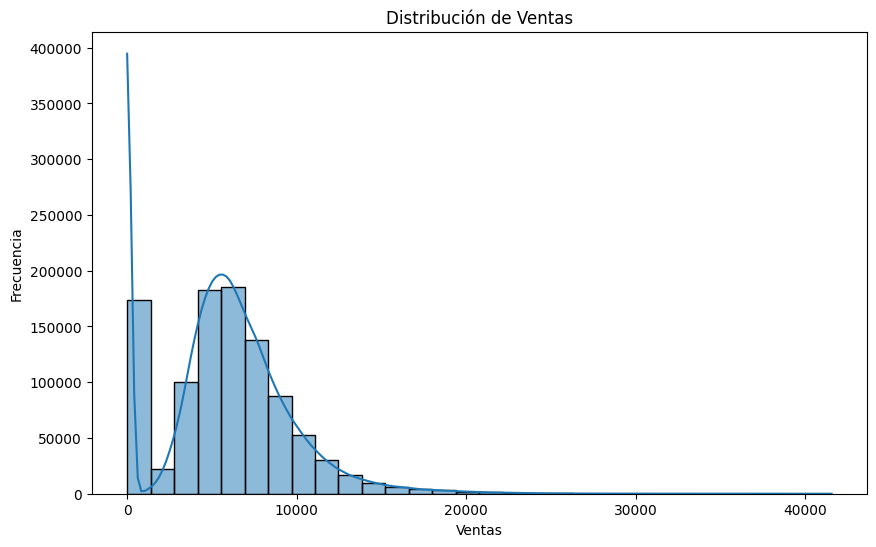

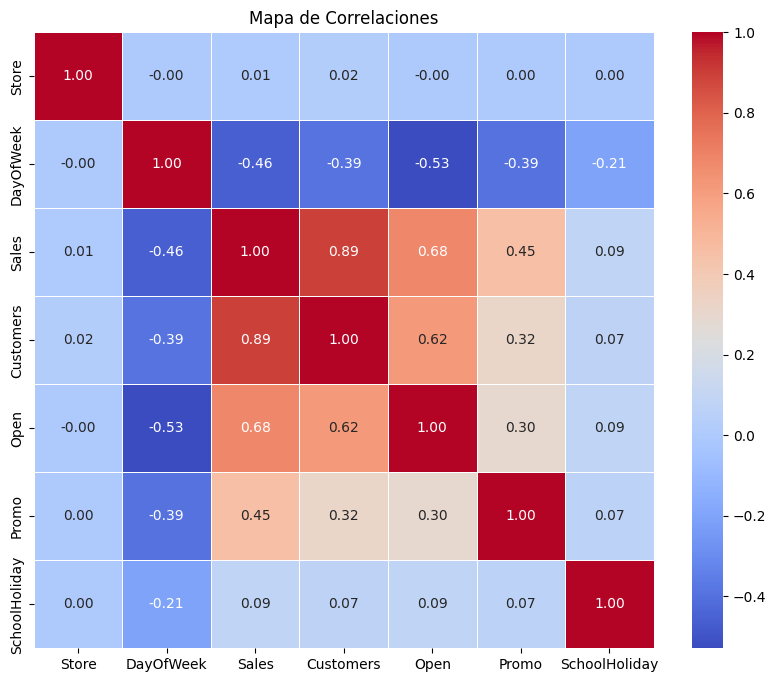

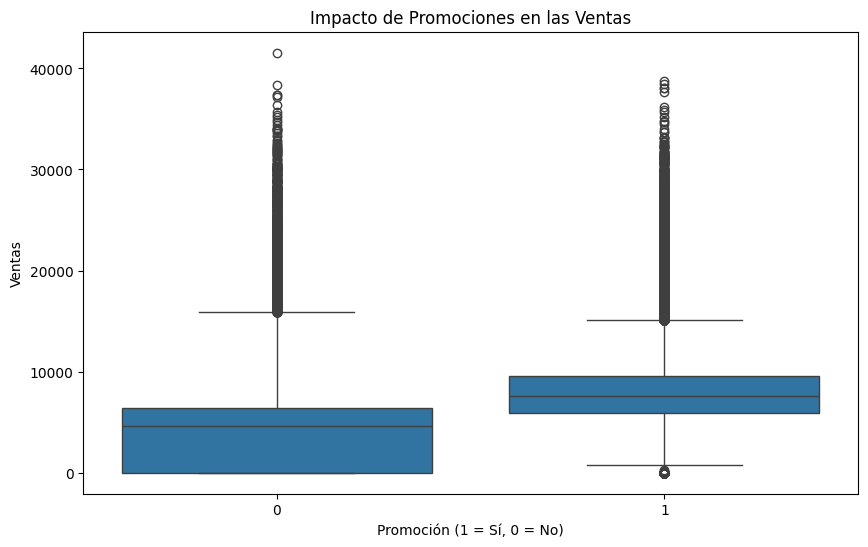

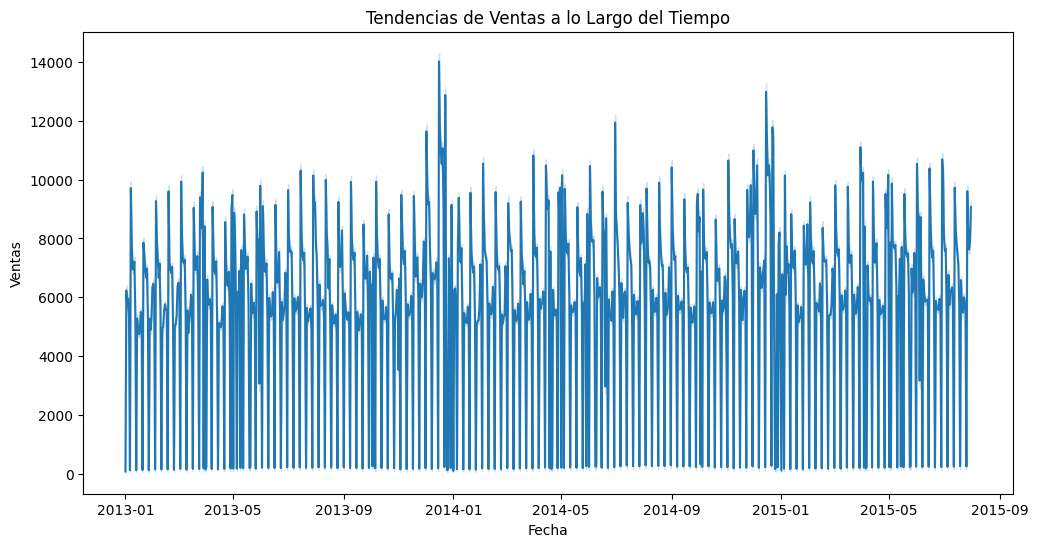

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Inspeccionar la distribución de las ventas
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Sales'], bins=30, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre variables numéricas (heatmap de correlaciones)
plt.figure(figsize=(10, 8))

# Seleccionar solo las columnas numéricas para el cálculo de la correlación
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_data[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlaciones')
plt.show()

# Impacto de variables categóricas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=train_data)
plt.title('Impacto de Promociones en las Ventas')
plt.xlabel('Promoción (1 = Sí, 0 = No)')
plt.ylabel('Ventas')
plt.show()

# Tendencias temporales
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=train_data)
plt.title('Tendencias de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

## Preprocesamiento de los Datos

### **1. Manejo de Valores Nulos**

### **2. Codificación de Variables Categóricas**

### **3. Escalado de Variables Numéricas**

### **4. División del Dataset**

El preprocesamiento asegura que los datos estén limpios, codificados y normalizados para el análisis posterior.

# Manejo de Valores Nulos

En este paso, abordamos los valores nulos presentes en el conjunto de datos `train_data`. A continuación, se detalla el proceso seguido:

### **1. Verificación de Valores Nulos**
- Se identificaron las columnas con valores nulos y se calculó el porcentaje de valores nulos en relación al total de registros.

### **2. Estrategia de Imputación**
- **Variables Categóricas**:
  - Los valores nulos fueron imputados con la moda (valor más frecuente).
  - Si había múltiples valores de moda, se seleccionó el primero.
- **Variables Numéricas**:
  - Se compararon la media y la mediana de cada columna:
    - Si la diferencia entre ambas era significativa (más del 10% de la media), se usó la mediana.
    - En caso contrario, se utilizó la media.

### **3. Resultados**
- Todos los valores nulos fueron eliminados mediante la imputación adecuada.
- Se generó un registro detallado de las decisiones tomadas para cada columna, garantizando la trazabilidad del proceso.

### **4. Verificación Final**
- Se verificó que no quedaran valores nulos en el conjunto de datos.

In [21]:
# Verificar valores nulos
print("=== Verificación Inicial de Valores Nulos ===")
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])  # Mostrar solo las columnas con valores nulos

# Porcentaje de valores nulos por columna
print("\n=== Porcentaje de Valores Nulos por Columna ===")
missing_percentage = (missing_values / len(train_data)) * 100
print(missing_percentage[missing_percentage > 0])  # Mostrar solo las columnas con nulos

# Registro de decisiones tomadas
decision_log = []

# Imputación inteligente de valores nulos
print("\n=== Imputación de Valores Nulos ===")
for column in train_data.columns:
    if train_data[column].isnull().sum() > 0:  # Verificar si hay valores nulos
        print(f"\nProcesando columna: '{column}'")
        
        if train_data[column].dtype == 'object':  # Variables categóricas
            mode_value = train_data[column].mode()
            if len(mode_value) > 1:
                print(f"Columna '{column}' tiene múltiples modas: {mode_value.values}. Seleccionando la primera.")
            train_data[column].fillna(mode_value[0], inplace=True)
            print(f"Valores nulos imputados con la moda: '{mode_value[0]}'")
            decision_log.append(f"'{column}' (Categórica): Imputada con la moda '{mode_value[0]}'")
        
        else:  # Variables numéricas
            mean_value = train_data[column].mean()
            median_value = train_data[column].median()
            print(f"Media: {mean_value}, Mediana: {median_value}")
            if abs(mean_value - median_value) > 0.1 * mean_value:
                train_data[column].fillna(median_value, inplace=True)
                print(f"Valores nulos imputados con la mediana: {median_value}")
                decision_log.append(f"'{column}' (Numérica): Imputada con la mediana '{median_value}'")
            else:
                train_data[column].fillna(mean_value, inplace=True)
                print(f"Valores nulos imputados con la media: {mean_value}")
                decision_log.append(f"'{column}' (Numérica): Imputada con la media '{mean_value}'")

# Verificación final de valores nulos
print("\n=== Verificación Final de Valores Nulos ===")
final_missing_values = train_data.isnull().sum()
print(final_missing_values[final_missing_values > 0])  # Debería estar vacío si no hay nulos

# Mostrar registro de decisiones
print("\n=== Registro de Decisiones Tomadas ===")
for log in decision_log:
    print(log)

=== Verificación Inicial de Valores Nulos ===
Series([], dtype: int64)

=== Porcentaje de Valores Nulos por Columna ===
Series([], dtype: float64)

=== Imputación de Valores Nulos ===

=== Verificación Final de Valores Nulos ===
Series([], dtype: int64)

=== Registro de Decisiones Tomadas ===


# Transformación de Variables Categóricas

En este paso, se transforman las variables categóricas del conjunto de datos `train_data` para que sean compatibles con los modelos de aprendizaje automático.

## **1. Identificación de Variables Categóricas**
- Se identificaron las columnas categóricas (`dtype='object'`) en el conjunto de datos.

## **2. Verificación de Cardinalidad**
- **Baja Cardinalidad**: Columnas con ≤ 20 valores únicos.
- **Alta Cardinalidad**: Columnas con > 20 valores únicos.

## **3. Manejo de Variables Categóricas**
- **One-Hot Encoding**: Aplicado a columnas con baja cardinalidad.
- **Label Encoding**: Utilizado para columnas con alta cardinalidad, asegurando eficiencia en el almacenamiento y procesamiento.

## **4. Resultados**
- Las variables categóricas han sido convertidas a formatos numéricos compatibles.
- La transformación asegura la integridad y compatibilidad de los datos con los modelos.

## **Notas Adicionales**
- Los encoders para columnas de alta cardinalidad se han almacenado para futuras referencias.
- Se verificó la estructura final del conjunto de datos para confirmar el éxito de las transformaciones.

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Paso 1: Identificar columnas categóricas
categorical_cols = train_data.select_dtypes(include=['object']).columns
print("\n=== Columnas Categóricas Identificadas ===")
print(categorical_cols)

# Paso 2: Verificar la cardinalidad de las columnas categóricas
print("\n=== Cardinalidad de las Columnas Categóricas ===")
for col in categorical_cols:
    unique_values = train_data[col].nunique()
    print(f"Columna '{col}': {unique_values} valores únicos")

# Detectar columnas con alta y baja cardinalidad
high_cardinality_cols = [col for col in categorical_cols if train_data[col].nunique() > 20]
low_cardinality_cols = [col for col in categorical_cols if col not in high_cardinality_cols]

# Reporte de cardinalidad
if high_cardinality_cols:
    print("\n=== Columnas con Alta Cardinalidad Detectadas (más de 20 valores únicos) ===")
    print(high_cardinality_cols)
else:
    print("\nNo se detectaron columnas con alta cardinalidad.")

if low_cardinality_cols:
    print("\n=== Columnas con Baja Cardinalidad Detectadas ===")
    print(low_cardinality_cols)
else:
    print("\nNo se detectaron columnas con baja cardinalidad.")

# Paso 3: Aplicar One-Hot Encoding a columnas categóricas con baja cardinalidad
if low_cardinality_cols:
    print("\nAplicando One-Hot Encoding a columnas con baja cardinalidad...")
    train_data = pd.get_dummies(train_data, columns=low_cardinality_cols, drop_first=True)

# Paso 4: Aplicar Label Encoding a columnas categóricas con alta cardinalidad (si existen)
if high_cardinality_cols:
    print("\nAplicando Label Encoding a columnas con alta cardinalidad...")
    label_encoders = {}  # Almacenar los encoders para referencia futura
    for col in high_cardinality_cols:
        print(f"Codificando columna: '{col}'")
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col])
        label_encoders[col] = le  # Guardar el encoder para referencia futura

# Paso 5: Verificar la transformación final
print("\n=== Estructura del Conjunto de Datos después de la Transformación ===")
print(train_data.info())
print("\nPrimeras filas del conjunto de datos transformado:")
print(train_data.head())


=== Columnas Categóricas Identificadas ===
Index([], dtype='object')

=== Cardinalidad de las Columnas Categóricas ===

No se detectaron columnas con alta cardinalidad.

No se detectaron columnas con baja cardinalidad.

=== Estructura del Conjunto de Datos después de la Transformación ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Store           1017209 non-null  float64       
 1   DayOfWeek       1017209 non-null  float64       
 2   Date            1017209 non-null  datetime64[ns]
 3   Sales           1017209 non-null  float64       
 4   Customers       1017209 non-null  float64       
 5   Open            1017209 non-null  float64       
 6   Promo           1017209 non-null  float64       
 7   SchoolHoliday   1017209 non-null  float64       
 8   Year            1017209 non-null  int32         
 9

# Escalado de Datos Numéricos

En este paso, las columnas numéricas del conjunto de datos `train_data` se transforman para normalizar su rango o estandarizar su distribución.

## **1. Identificación de Columnas Numéricas**
- Se identifican las columnas con tipos de datos numéricos (`float64` y `int64`).

## **2. Análisis de Distribución**
- Se calculan estadísticas descriptivas para entender el rango y la presencia de valores extremos.

## **3. Selección del Método de Escalado**
- **MinMaxScaler**:
  - Escala los datos al rango [0, 1].
  - Adecuado para columnas sin valores extremos significativos.
- **StandardScaler**:
  - Estandariza los datos restando la media y dividiendo por la desviación estándar.
  - Ideal para columnas con valores extremos.

## **4. Aplicación del Escalado**
- Se aplica el método más adecuado a cada columna numérica.

## **5. Guardado de Scalers**
- Los scalers utilizados se guardan en archivos `.pkl` para garantizar que el mismo proceso de escalado pueda aplicarse a nuevos datos.

## **Resultados Esperados**
- Todas las columnas numéricas estarán escaladas.
- Los scalers estarán disponibles para su reutilización.

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import joblib

# Paso 1: Identificar columnas numéricas
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
print("\n=== Columnas Numéricas Identificadas para Escalado ===")
print(numeric_cols)

# Paso 2: Analizar la distribución de las columnas numéricas
print("\n=== Análisis de Distribución de Columnas Numéricas ===")
for col in numeric_cols:
    print(f"\nEstadísticas de la columna '{col}':")
    print(train_data[col].describe())

# Paso 3: Seleccionar el método de escalado basado en la distribución
scalers = {}  # Diccionario para guardar los scalers aplicados
for col in numeric_cols:
    # Detectar valores extremos usando el rango intercuartílico (IQR)
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar valores extremos
    outliers = ((train_data[col] < lower_bound) | (train_data[col] > upper_bound)).sum()
    print(f"\nValores extremos detectados en '{col}': {outliers}")

    # Seleccionar y aplicar el método de escalado
    if outliers > 0:
        print(f"Usando **StandardScaler** para '{col}' debido a la presencia de valores extremos.")
        scaler = StandardScaler()
    else:
        print(f"Usando **MinMaxScaler** para '{col}'.")
        scaler = MinMaxScaler()

    # Aplicar el escalado
    train_data[[col]] = scaler.fit_transform(train_data[[col]])
    scalers[col] = scaler  # Guardar el scaler para su uso futuro

# Paso 4: Verificar la transformación
print("\n=== Datos Después de Aplicar el Escalado ===")
print(train_data[numeric_cols].head())

# Paso 5: Guardar los scalers (opcional)
print("\n=== Guardando Scalers Utilizados ===")
for col, scaler in scalers.items():
    filename = f"{col}_scaler.pkl"
    joblib.dump(scaler, filename)
    print(f"Scaler para '{col}' guardado en: {filename}")

print("\nTodos los scalers han sido guardados exitosamente.")


=== Columnas Numéricas Identificadas para Escalado ===
Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday'],
      dtype='object')

=== Análisis de Distribución de Columnas Numéricas ===

Estadísticas de la columna 'Store':
count    1.017209e+06
mean     5.003858e-01
std      2.889665e-01
min      0.000000e+00
25%      2.504488e-01
50%      5.000000e-01
75%      7.513465e-01
max      1.000000e+00
Name: Store, dtype: float64

Estadísticas de la columna 'DayOfWeek':
count    1.017209e+06
mean     4.997234e-01
std      3.328985e-01
min      0.000000e+00
25%      1.666667e-01
50%      5.000000e-01
75%      8.333333e-01
max      1.000000e+00
Name: DayOfWeek, dtype: float64

Estadísticas de la columna 'Sales':
count    1.017209e+06
mean     6.057582e-17
std      1.000000e+00
min     -1.499723e+00
25%     -5.316517e-01
50%     -7.745340e-03
75%      5.408369e-01
max      9.292957e+00
Name: Sales, dtype: float64

Estadísticas de la columna 'Customers':
c

# División del Dataset en Conjuntos de Entrenamiento y Prueba

Este paso separa el dataset en características (X) y variable objetivo (y), y posteriormente divide los datos en conjuntos de entrenamiento y prueba. Esto asegura que el modelo sea evaluado adecuadamente en datos no vistos.

---

## 1. Separación de Características y Variable Objetivo
- **Características (`X`)**: Todas las columnas excepto la variable objetivo.
- **Variable objetivo (`y`)**: La columna que queremos predecir, definida como `Sales` en este caso.

Se valida la presencia de la variable objetivo en el dataset antes de proceder.

---

## 2. Análisis de la Variable Objetivo
- Se verifica si la variable objetivo tiene menos de 20 valores únicos para identificar posibles problemas de desequilibrio.
- Si se detecta un desequilibrio significativo, se recomienda usar **estratificación** al dividir los datos.

---

## 3. División en Conjuntos de Entrenamiento y Prueba
- Se utiliza una proporción de 80%-20% para dividir los datos:
  - **80%** para el conjunto de entrenamiento.
  - **20%** para el conjunto de prueba.
- La estratificación se puede habilitar para garantizar que la distribución de la variable objetivo sea representativa en ambos conjuntos.

---

## 4. Validación de los Conjuntos
- Se imprimen las dimensiones de los conjuntos resultantes:
  - `X_train` y `y_train` para el entrenamiento.
  - `X_test` y `y_test` para la evaluación.
- También se verifica que las proporciones de datos sean correctas.

---

## 5. Guardado de los Conjuntos Divididos (Opcional)
- Los conjuntos de entrenamiento y prueba se guardan como archivos `.pkl` utilizando **joblib**.
- Esto permite reutilizar los conjuntos en etapas posteriores del proyecto, asegurando reproducibilidad.

---

## Resultados Esperados
- Los datos estarán correctamente divididos en conjuntos de entrenamiento y prueba.
- La proporción de los conjuntos será 80%-20%, salvo que se especifique un ajuste diferente.
- Los archivos resultantes se guardarán en el directorio de trabajo, listos para ser utilizados en el modelado.

In [24]:
from sklearn.model_selection import train_test_split

# Paso 1: Separar características (X) y variable objetivo (y)
target_column = 'Sales'  # Definir la variable objetivo
if target_column not in train_data.columns:
    raise ValueError(f"La columna objetivo '{target_column}' no se encuentra en el dataset.")

print("\nSeparando características (X) y variable objetivo (y)...")
X = train_data.drop(target_column, axis=1)
y = train_data[target_column]

# Validar dimensiones de X e y
print(f"Dimensión de X (características): {X.shape}")
print(f"Dimensión de y (objetivo): {y.shape}")

# Paso 2: Validar si hay desequilibrio en la variable objetivo
if y.nunique() < 20:  # Supongamos que menos de 20 valores únicos podría ser una variable categórica o ordinal
    print("\nAnálisis de distribución de la variable objetivo:")
    print(y.value_counts(normalize=True))
    print("\nSe recomienda usar estratificación si se observa un desequilibrio significativo.")

# Paso 3: Dividir en conjuntos de entrenamiento y prueba
print("\nDividiendo el dataset en conjuntos de entrenamiento y prueba (80% - 20%)...")
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.2, 
        random_state=42, 
        stratify=None  # Cambiar a y si la variable objetivo está desequilibrada
    )
except ValueError as e:
    raise ValueError(f"Error al dividir el dataset: {e}")

# Paso 4: Validar tamaños de los conjuntos
print("\nValidando tamaños de los conjuntos...")
print(f"Tamaño del conjunto de entrenamiento: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Tamaño del conjunto de prueba: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Paso 5: Verificar proporción de datos en los conjuntos
print("\nVerificando proporción de datos en los conjuntos:")
train_ratio = len(X_train) / (len(X_train) + len(X_test))
test_ratio = len(X_test) / (len(X_train) + len(X_test))
print(f"Proporción en conjunto de entrenamiento: {train_ratio:.2%}")
print(f"Proporción en conjunto de prueba: {test_ratio:.2%}")

# Paso 6: Guardar los conjuntos divididos (opcional, para uso posterior o reproducibilidad)
import joblib

print("\nGuardando conjuntos divididos en archivos...")
joblib.dump(X_train, "X_train.pkl")
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_test, "y_test.pkl")
print("Conjuntos guardados exitosamente.")


Separando características (X) y variable objetivo (y)...
Dimensión de X (características): (1017209, 14)
Dimensión de y (objetivo): (1017209,)

Dividiendo el dataset en conjuntos de entrenamiento y prueba (80% - 20%)...

Validando tamaños de los conjuntos...
Tamaño del conjunto de entrenamiento: X_train: (813767, 14), y_train: (813767,)
Tamaño del conjunto de prueba: X_test: (203442, 14), y_test: (203442,)

Verificando proporción de datos en los conjuntos:
Proporción en conjunto de entrenamiento: 80.00%
Proporción en conjunto de prueba: 20.00%

Guardando conjuntos divididos en archivos...
Conjuntos guardados exitosamente.
